# RQ1 Analysis
Research Question: Does the drinking water have increasing levels of PFAs over the years of observations?

In [1]:
#load in libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load in data
url_download ='https://docs.google.com/spreadsheets/d/14Mv-sjV11S3HSy_TzdUefWglVw4anyczpWllNfTwGls/gviz/tq?tqx=out:csv'
water_data = pd.read_csv(url_download, encoding='utf-8')
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample Date                  147 non-null    object 
 1   PFBA (ppt)                   147 non-null    object 
 2   PFPeA (ppt)                  71 non-null     float64
 3   PFBS (ppt)                   147 non-null    object 
 4   PFHxA (ppt)                  147 non-null    object 
 5   PFHpA (ppt)                  104 non-null    float64
 6   PFHxS (ppt)                  147 non-null    object 
 7   PFOA (ppt)                   147 non-null    object 
 8   PFNA (ppt)                   147 non-null    object 
 9   PFOS (ppt)                   147 non-null    object 
 10  6:2 FTS (ppt)                147 non-null    object 
 11  Sum of PFOS and  PFOA (ppt)  147 non-null    object 
 12  Sum of All PFAS  (ppt)       147 non-null    float64
dtypes: float64(3), objec

In [3]:
#remove whitespace from column names
water_data.columns = [col.strip() for col in water_data.columns]
water_data.columns = [col.replace('\xa0','') for col in water_data.columns]
water_data.columns = [col.replace(' ','') for col in water_data.columns]

We will be analyzing the PFAs: PFBA, PFPeA, PFBS, PFHxA, PFHpA, PFHxS, PFOA, PFNA, PFOS, and 6:2FTS. The "Sample Date" column does not offer information on PFA values, and the remaining two columns are combinations of PFAs. We will ignore those for this analysis.

In [4]:
#get rid of extra columns
water_data = water_data.drop(columns=['SumofPFOSandPFOA(ppt)', 'SumofAllPFAS(ppt)'])
#show data
water_data

,SampleDate,PFBA(ppt),PFPeA(ppt),PFBS(ppt),PFHxA(ppt),PFHpA(ppt),PFHxS(ppt),PFOA(ppt),PFNA(ppt),PFOS(ppt),6:2FTS(ppt)
0,04/19/23,Not measured,NaN,Not detected,Not detected,NaN,Not detected,Not detected,Not detected,Not detected,Not measured
1,04/05/23,Not detected,2.9,Not detected,Not detected,NaN,Not detected,Not detected,Not detected,Not detected,Not detected
2,03/21/23,Not detected,3.2,Not detected,Not detected,NaN,Not detected,Not detected,Not detected,Not detected,Not detected
3,03/07/23,Not detected,5.1,Not detected,2.6,2.5,Not detected,Not detected,Not detected,Not detected,Not detected
4,02/01/23,5.2,6.1,Not detected,3.8,4.7,Not detected,Not detected,Not detected,Not detected,2.2
...,...,...,...,...,...,...,...,...,...,...,...
142,11/08/16,Not measured,NaN,Not measured,Not measured,NaN,Not measured,Not detected,Not measured,8.1,Not measured
143,10/05/16,Not measured,NaN,5.3,Not measured,4.8,Not detected,Not detected,Not detected,7.1,Not measured
144,07/21/16,Not measured,NaN,9.2,Not measured,5.3,Not detected,3,Not detected,16,Not measured
145,03/28/16,Not measured,NaN,Not detected,Not measured,2.1,Not detected,Not detected,Not detected,11,Not measured


There seem to be many observations that read either "Not measured" or "Not detected." "Not detected" refers to a PFA being looked at, but either none or a negligible amount of it was found, so that their amount was or nearly was 0 ppt. If a PFA was not detected, we can change that value to 0, as it means that there was a negligible amount of that PFA in the observation. "Not measured" refers to an observation not looking at a PFA, so there was an unknown amount of it in the given observation. Values that were not measured do not give us any meaningful information, but in the interest of keeping the rest of the information from each observation, we will leave those values alone for now. "NaN" values in the PFPeA column seem to mean "Not measured" and in the PFHpA column mean "Not detected" from looking at the original data set, so they will be changed accordingly.

We will convert the PFA measurements to floats so that we can plot their number values. First, we have to convert "Not detected" values to 0, as they were negligible amounts. In order to keep the "Not measured" observations while still having float values to plot, "Not measured" values will be represented using -1. Extra whitespace or characters found in the data set will be removed, as they give no information to our analysis and we want float values.

In [5]:
#change not measured values to 0
for col in water_data:
    #skip sample date, will not have numerical values
    if col != 'SampleDate':
        #convert to strings to replace values
        water_data[col] = water_data[col].astype('string')
        
        #also remove 'J' characters from values
        water_data[col] = water_data[col].str.replace("Not detected", '0').str.replace('J', '')
        
        #tidy NaN values
        if col == 'PFPeA(ppt)':
            water_data[col] = water_data[col].fillna('-1')
            
        if col == 'PFHpA(ppt)':
            water_data[col] = water_data[col].fillna('0')
        
        #just so the columns can be floats, give 'not measured' elements a value of -1
        #to find again in the future
        water_data[col] = water_data[col].str.replace("Not measured", '-1')
        
        #get rid of any extra whitespace
        water_data[col] = [val.strip() for val in water_data[col]]

#remove extra unicode characters
for col in water_data:
    water_data[col] = water_data[col].str.replace('\xa0', '')
        
#reverse data so that earlier observations are at the beginning and later observations are at the end
water_data = water_data.loc[::-1]
water_data.index = range(147)

#show data types
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SampleDate   147 non-null    object
 1   PFBA(ppt)    147 non-null    object
 2   PFPeA(ppt)   147 non-null    object
 3   PFBS(ppt)    147 non-null    object
 4   PFHxA(ppt)   147 non-null    object
 5   PFHpA(ppt)   147 non-null    object
 6   PFHxS(ppt)   147 non-null    object
 7   PFOA(ppt)    147 non-null    object
 8   PFNA(ppt)    147 non-null    object
 9   PFOS(ppt)    147 non-null    object
 10  6:2FTS(ppt)  147 non-null    object
dtypes: object(11)
memory usage: 12.8+ KB


In [6]:
#change PFA values to floats
for col in water_data:
    #skip sample date, do not need it as a float
    if col != 'SampleDate':
        water_data[col] = water_data[col].astype(float)

#show data
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SampleDate   147 non-null    object 
 1   PFBA(ppt)    147 non-null    float64
 2   PFPeA(ppt)   147 non-null    float64
 3   PFBS(ppt)    147 non-null    float64
 4   PFHxA(ppt)   147 non-null    float64
 5   PFHpA(ppt)   147 non-null    float64
 6   PFHxS(ppt)   147 non-null    float64
 7   PFOA(ppt)    147 non-null    float64
 8   PFNA(ppt)    147 non-null    float64
 9   PFOS(ppt)    147 non-null    float64
 10  6:2FTS(ppt)  147 non-null    float64
dtypes: float64(10), object(1)
memory usage: 12.8+ KB


We will now isolate each PFA column to analyze and plot. We will also remove the -1 values from each column, so that the 'Not measured' values, which give us no information, are ommitted without removing entire observations.

In [7]:
#get columns by themselves
pfba_df = water_data.loc[:,['PFBA(ppt)']]
pfba_df = pfba_df[pfba_df['PFBA(ppt)'] >= 0]
pfpea_df = water_data.loc[:,['PFPeA(ppt)']]
pfpea_df = pfpea_df[pfpea_df['PFPeA(ppt)'] >= 0]
pfbs_df = water_data.loc[:,['PFBS(ppt)']]
pfbs_df = pfbs_df[pfbs_df['PFBS(ppt)'] >= 0]
pfhxa_df = water_data.loc[:,['PFHxA(ppt)']]
pfhxa_df = pfhxa_df[pfhxa_df['PFHxA(ppt)'] >= 0]
pfhpa_df = water_data.loc[:,['PFHpA(ppt)']]
pfhpa_df = pfhpa_df[pfhpa_df['PFHpA(ppt)'] >= 0]
pfhxs_df = water_data.loc[:,['PFHxS(ppt)']]
pfhxs_df = pfhxs_df[pfhxs_df['PFHxS(ppt)'] >= 0]
pfoa_df = water_data.loc[:,['PFOA(ppt)']]
pfoa_df = pfoa_df[pfoa_df['PFOA(ppt)'] >= 0]
pfna_df = water_data.loc[:,['PFNA(ppt)']]
pfna_df = pfna_df[pfna_df['PFNA(ppt)'] >= 0]
pfos_df = water_data.loc[:,['PFOS(ppt)']]
pfos_df = pfos_df[pfos_df['PFOS(ppt)'] >= 0]
fts_df = water_data.loc[:,['6:2FTS(ppt)']]
fts_df = fts_df[fts_df['6:2FTS(ppt)'] >= 0]

#show some data
pfba_df

,PFBA(ppt)
24,3.1
25,4.4
26,4.0
27,3.7
28,5.7
...,...
140,4.8
142,5.2
143,0.0
144,0.0


We can now visualize each PFA average for each month observed to see trends in PFA presence.

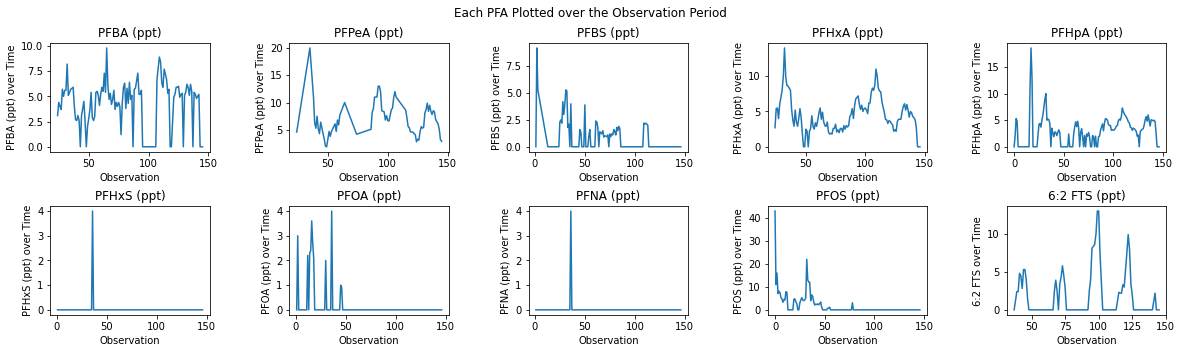

In [11]:
#visualize monthly averages
fig, axs = plt.subplots(2, 5, figsize=(20, 5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.suptitle('Each PFA Plotted over the Observation Period')
axs[0][0].plot(pfba_df)
axs[0][0].set(title='PFBA (ppt)', xlabel='Observation', ylabel='PFBA (ppt) over Time')
axs[0][1].plot(pfpea_df)
axs[0][1].set(title='PFPeA (ppt)', xlabel='Observation', ylabel='PFPeA (ppt) over Time')
axs[0][2].plot(pfbs_df)
axs[0][2].set(title='PFBS (ppt)', xlabel='Observation', ylabel='PFBS (ppt) over Time')
axs[0][3].plot(pfhxa_df)
axs[0][3].set(title='PFHxA (ppt)', xlabel='Observation', ylabel='PFHxA (ppt) over Time')
axs[0][4].plot(pfhpa_df)
axs[0][4].set(title='PFHpA (ppt)', xlabel='Observation', ylabel='PFHpA (ppt) over Time')
axs[1][0].plot(pfhxs_df)
axs[1][0].set(title='PFHxS (ppt)', xlabel='Observation', ylabel='PFHxS (ppt) over Time')
axs[1][1].plot(pfoa_df)
axs[1][1].set(title='PFOA (ppt)', xlabel='Observation', ylabel='PFOA (ppt) over Time')
axs[1][2].plot(pfna_df)
axs[1][2].set(title='PFNA (ppt)', xlabel='Observation', ylabel='PFNA (ppt) over Time')
axs[1][3].plot(pfos_df)
axs[1][3].set(title='PFOS (ppt)', xlabel='Observation', ylabel='PFOS (ppt) over Time')
axs[1][4].plot(fts_df)
axs[1][4].set(title='6:2 FTS (ppt)', xlabel='Observation', ylabel='6:2 FTS over Time')
plt.show()

Observations were not taken at consistent intervals, so the PFA amounts may be misleading due to observations being spread out in time. Because of this, these plots would not be able to show an exact relationship between PFA values and time, and we will only use these plots to see if PFA values seem to increase throughout their observations. PFNA and PFHxS both seem to have only one non-zero value, so we will check their values to see if we should still consider them in our evaluation.

In [12]:
pfna_df.value_counts()

PFNA(ppt)
0.0          131
4.0            1
dtype: int64

In [13]:
pfhxs_df.value_counts()

PFHxS(ppt)
0.0           131
4.0             1
dtype: int64

PFNA and PFHxS seem to only have one observation that measured and detected them, meaning there is no current concern for their presence in Ann Arbor drinking water. We will then plot a linear regression line on the remaining PFA plots, as it is not clear whether they have possible increasing trends in their amounts over time.

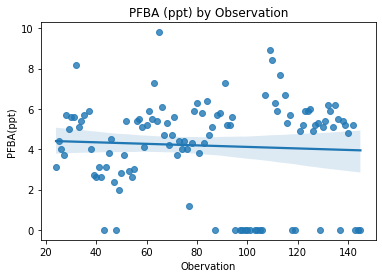

In [14]:
#plot PFBA with a linear regression line
pfba_graph = water_data[water_data['PFBA(ppt)'] >= 0]
sns.regplot(x=pfba_graph.index, y='PFBA(ppt)', data=pfba_graph)
plt.title('PFBA (ppt) by Observation')
plt.xlabel('Obervation')
plt.show()

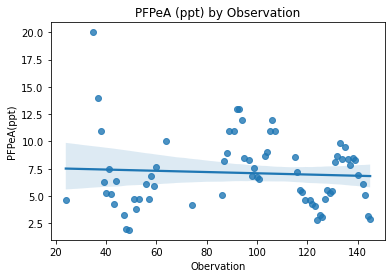

In [15]:
#plot PFPeA with a linear regression line
pfpea_graph = water_data[water_data['PFPeA(ppt)'] >= 0]
sns.regplot(x=pfpea_graph.index, y='PFPeA(ppt)', data=pfpea_graph)
plt.title('PFPeA (ppt) by Observation')
plt.xlabel('Obervation')
plt.show()

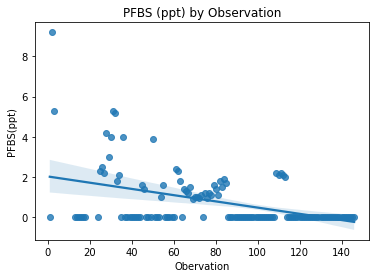

In [16]:
#plot PFBS with a linear regression line
pfbs_graph = water_data[water_data['PFBS(ppt)'] >= 0]
sns.regplot(x=pfbs_graph.index, y='PFBS(ppt)', data=pfbs_graph)
plt.title('PFBS (ppt) by Observation')
plt.xlabel('Obervation')
plt.show()

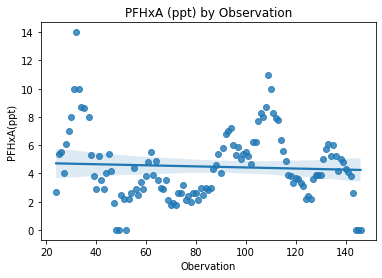

In [17]:
#plot PFHxA with a linear regression line
pfhxa_graph = water_data[water_data['PFHxA(ppt)'] >= 0]
sns.regplot(x=pfhxa_graph.index, y='PFHxA(ppt)', data=pfhxa_graph)
plt.title('PFHxA (ppt) by Observation')
plt.xlabel('Obervation')
plt.show()

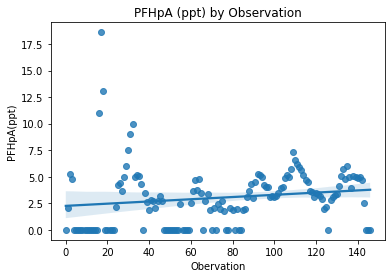

In [18]:
#plot PFHpA with a linear regression line
pfhpa_graph = water_data[water_data['PFHpA(ppt)'] >= 0]
sns.regplot(x=pfhpa_graph.index, y='PFHpA(ppt)', data=pfhpa_graph)
plt.title('PFHpA (ppt) by Observation')
plt.xlabel('Obervation')
plt.show()

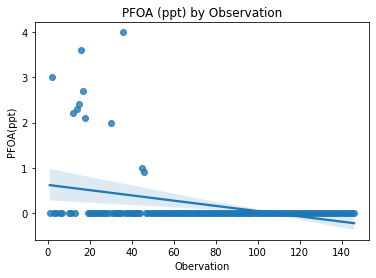

In [19]:
#plot PFOA with a linear regression line
pfoa_graph = water_data[water_data['PFOA(ppt)'] >= 0]
sns.regplot(x=pfoa_graph.index, y='PFOA(ppt)', data=pfoa_graph)
plt.title('PFOA (ppt) by Observation')
plt.xlabel('Obervation')
plt.show()

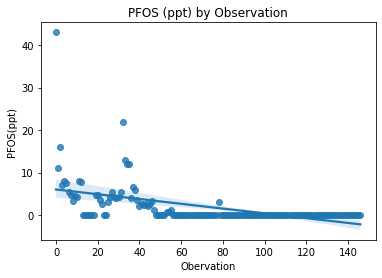

In [20]:
#plot PFOS with a linear regression line
pfos_graph = water_data[water_data['PFOS(ppt)'] >= 0]
sns.regplot(x=pfos_graph.index, y='PFOS(ppt)', data=pfos_graph)
plt.title('PFOS (ppt) by Observation')
plt.xlabel('Obervation')
plt.show()

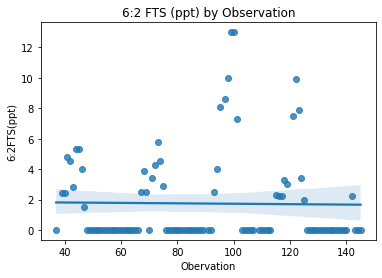

In [21]:
#plot 6:2 FTS with a linear regression line
fts_graph = water_data[water_data['6:2FTS(ppt)'] >= 0]
sns.regplot(x=fts_graph.index, y='6:2FTS(ppt)', data=fts_graph)
plt.title('6:2 FTS (ppt) by Observation')
plt.xlabel('Obervation')
plt.show()